In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
data1 = pd.read_csv('patients.csv', sep=';' , encoding = 'utf-8')

/Users/flore/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data1.head()

,Unnamed: 0,studyid,encid,soc_hx_dt_m,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,pt_birth_dt_m,...,dx4_nm,dx5_dt_m,dx5_cd,dx5_nm,dx6_dt_m,dx6_cd,dx6_nm,dx7_dt_m,dx7_cd,dx7_nm
0,0,PT101071,ENC8471401,2013-11-08,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,PT101071,ENC9836064,2013-12-20,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,PT101071,ENC15082,2014-04-08,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,PT101071,ENC17976449,2013-10-19,FORMER SMOKER,9.0,9.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,PT101071,ENC11067729,2014-07-30,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(data1)

4303917

In [5]:
len(data1['studyid'].unique())

165804

In [6]:
del data1['Unnamed: 0']

In [7]:
data1['soc_hx_dt_m'] = pd.to_datetime(data1['soc_hx_dt_m'])
date = data1['soc_hx_dt_m']

In [8]:
min(date)

Timestamp('1996-09-06 00:00:00')

In [9]:
max(date)

Timestamp('2017-07-14 00:00:00')

# Definition of the groups

group 1 : patients who were diagnosed between 1996 and 2000 /
group 2 : patients who were diagnosed between 2000 and 2004 /
group 3 : patients who were diagnosed between 2004 and 2008 /
group 4 : patients who were diagnosed between 2008 and 2012 /
group 5 : patients who were diagnosed between 2012 and 2017

In [10]:
group1 = data1[data1['soc_hx_dt_m'].dt.year <= 2000]

In [11]:
group2 = data1[np.logical_and(data1['soc_hx_dt_m'].dt.year <= 2004, data1['soc_hx_dt_m'].dt.year > 2000)]


In [12]:
group3 = data1[np.logical_and(data1['soc_hx_dt_m'].dt.year <= 2008, data1['soc_hx_dt_m'].dt.year > 2004)]

In [13]:
group4 = data1[np.logical_and(data1['soc_hx_dt_m'].dt.year <= 2012, data1['soc_hx_dt_m'].dt.year > 2008)]

In [14]:
group5 = data1[data1['soc_hx_dt_m'].dt.year > 2012]

In [15]:
import math
data1['label_group'] = pd.cut(data1['soc_hx_dt_m'].dt.year, bins = [-math.inf, 2000, 2004, 2008, 2012, math.inf], labels=[1,2,3,4,5], include_lowest=True)

In [16]:
data1.head()

,studyid,encid,soc_hx_dt_m,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,pt_birth_dt_m,pt_death_dt_m,...,dx5_dt_m,dx5_cd,dx5_nm,dx6_dt_m,dx6_cd,dx6_nm,dx7_dt_m,dx7_cd,dx7_nm,label_group
0,PT101071,ENC8471401,2013-11-08,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,PT101071,ENC9836064,2013-12-20,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,PT101071,ENC15082,2014-04-08,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,PT101071,ENC17976449,2013-10-19,FORMER SMOKER,9.0,9.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,PT101071,ENC11067729,2014-07-30,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,2014-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# Smoking

In [17]:
data1['label_smoker'] = data1['soc_hx_smoke_stts']
group1['label_smoker'] = group1['soc_hx_smoke_stts']
group2['label_smoker'] = group2['soc_hx_smoke_stts']
group3['label_smoker'] = group3['soc_hx_smoke_stts']
group4['label_smoker'] = group4['soc_hx_smoke_stts']
group5['label_smoker'] = group5['soc_hx_smoke_stts']

/Users/flore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/flore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [18]:
cleanup_smokers = {"label_smoker": {"NEVER SMOKER": 0, "FORMER SMOKER": 0, "CURRENT EVERY DAY SMOKER": 2, 
                                         "CURRENT SOME DAY SMOKER": 1, "NEVER ASSESSED": 3,"PASSIVE SMOKE EXPOSURE - NEVER SMOKER": 0, "LIGHT TOBACCO SMOKER":1,
                                         "HEAVY TOBACCO SMOKER": 2, "UNKNOWN IF EVER SMOKED": 3, 
                                         "SMOKER, CURRENT STATUS UNKNOWN":1 }}
group1.replace(cleanup_smokers, inplace=True)
group2.replace(cleanup_smokers, inplace=True)
group3.replace(cleanup_smokers, inplace=True)
group4.replace(cleanup_smokers, inplace=True)
group5.replace(cleanup_smokers, inplace=True)
data1.replace(cleanup_smokers, inplace=True)


/Users/flore/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [19]:
group1['label_smoker'].value_counts()


0    44342
2    19584
3     5933
Name: label_smoker, dtype: int64

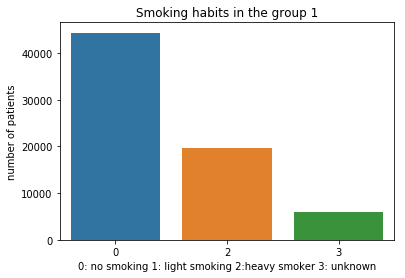

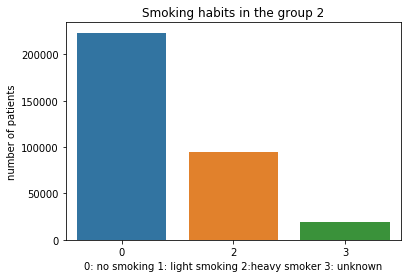

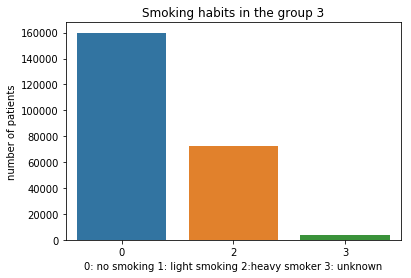

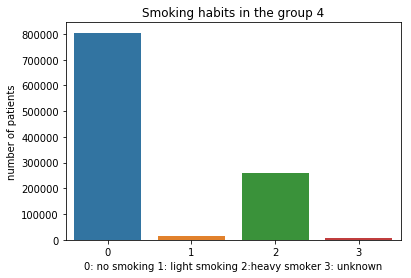

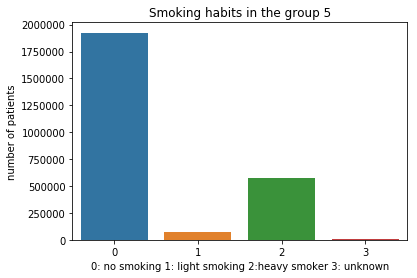

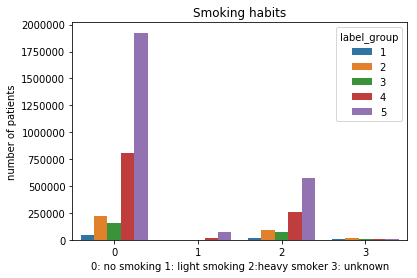

In [20]:
sns.countplot(group1['label_smoker'])
plt.title('Smoking habits in the group 1')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group2['label_smoker'])
plt.title('Smoking habits in the group 2')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group3['label_smoker'])
plt.title('Smoking habits in the group 3')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group4['label_smoker'])
plt.title('Smoking habits in the group 4')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group5['label_smoker'])
plt.title('Smoking habits in the group 5')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(x="label_smoker", hue="label_group", data = data1)
plt.title('Smoking habits')
plt.xlabel('0: no smoking 1: light smoking 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

# Drugs

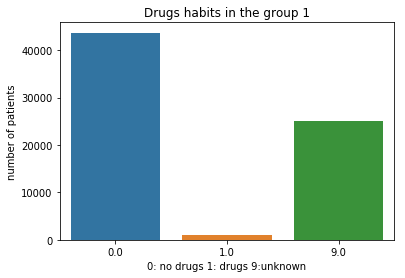

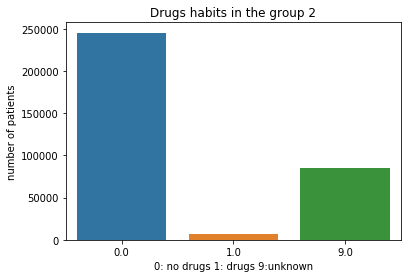

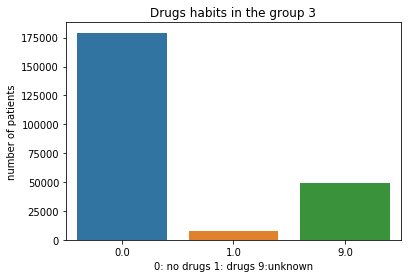

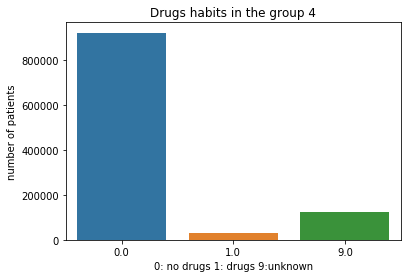

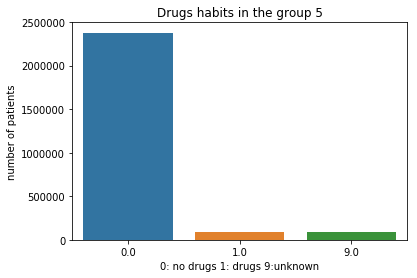

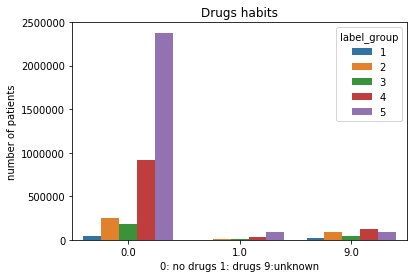

In [21]:
sns.countplot(group1['soc_hx_ill_drug_yn'])
plt.title('Drugs habits in the group 1')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group2['soc_hx_ill_drug_yn'])
plt.title('Drugs habits in the group 2')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group3['soc_hx_ill_drug_yn'])
plt.title('Drugs habits in the group 3')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group4['soc_hx_ill_drug_yn'])
plt.title('Drugs habits in the group 4')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group5['soc_hx_ill_drug_yn'])
plt.title('Drugs habits in the group 5')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(x="soc_hx_ill_drug_yn", hue="label_group", data = data1)
plt.title('Drugs habits')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

# Alcohol

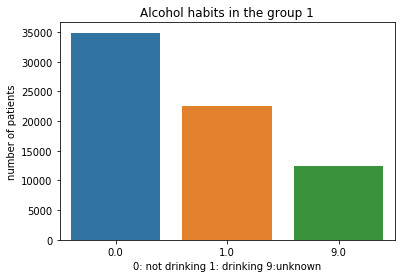

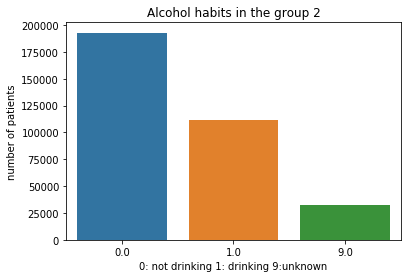

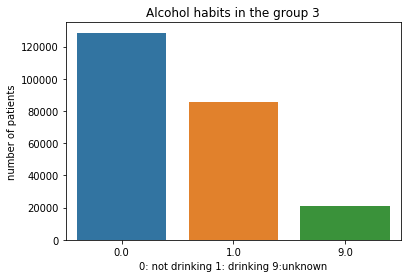

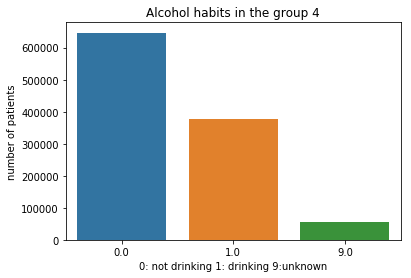

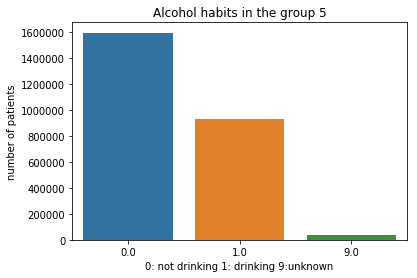

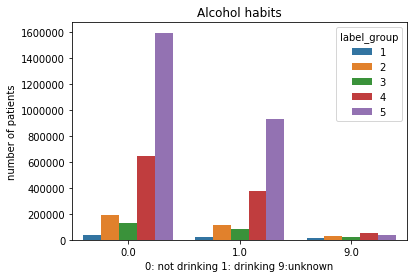

In [22]:
sns.countplot(group1['soc_hx_alc_yn'])
plt.title('Alcohol habits in the group 1')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group2['soc_hx_alc_yn'])
plt.title('Alcohol habits in the group 2')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group3['soc_hx_alc_yn'])
plt.title('Alcohol habits in the group 3')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group4['soc_hx_alc_yn'])
plt.title('Alcohol habits in the group 4')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group5['soc_hx_alc_yn'])
plt.title('Alcohol habits in the group 5')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(x="soc_hx_alc_yn", hue="label_group", data = data1)
plt.title('Alcohol habits')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

# Sexual activity

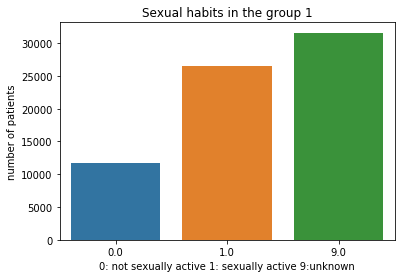

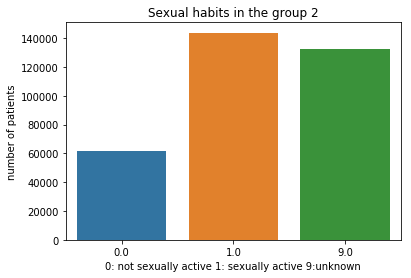

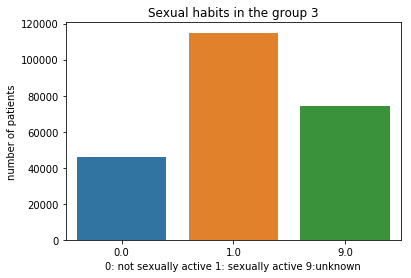

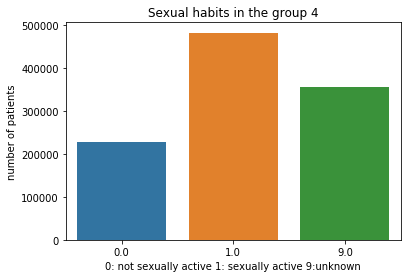

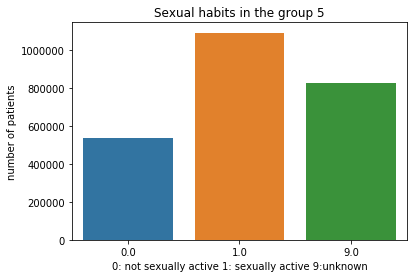

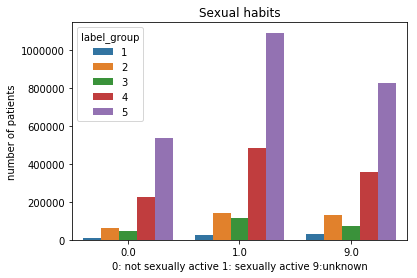

In [23]:
sns.countplot(group1['soc_hx_sexual_act_yn'])
plt.title('Sexual habits in the group 1')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group2['soc_hx_sexual_act_yn'])
plt.title('Sexual habits in the group 2')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group3['soc_hx_sexual_act_yn'])
plt.title('Sexual habits in the group 3')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group4['soc_hx_sexual_act_yn'])
plt.title('Sexual habits in the group 4')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(group5['soc_hx_sexual_act_yn'])
plt.title('Sexual habits in the group 5')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

sns.countplot(x="soc_hx_sexual_act_yn", hue="label_group", data = data1)
plt.title('Sexual habits')
plt.xlabel('0: not sexually active 1: sexually active 9:unknown')
plt.ylabel('number of patients')
plt.show()

In [24]:
data2 = pd.read_csv('patients_with_labels.csv', sep=';' , encoding = 'utf-8')


/Users/flore/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
data2.head()

,Unnamed: 0,studyid,encid,soc_hx_dt_m,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,pt_birth_dt_m,...,dx6_cd,dx6_nm,dx7_dt_m,dx7_cd,dx7_nm,label_sex,label_ethnicity,Age,label_age,label_smoker
0,0,PT101071,ENC8471401,2013-11-08,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
1,1,PT101071,ENC9836064,2013-12-20,FORMER SMOKER,0.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
2,2,PT101071,ENC15082,2014-04-08,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
3,3,PT101071,ENC17976449,2013-10-19,FORMER SMOKER,9.0,9.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
4,4,PT101071,ENC11067729,2014-07-30,FORMER SMOKER,1.0,0.0,9.0,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,83,3,0


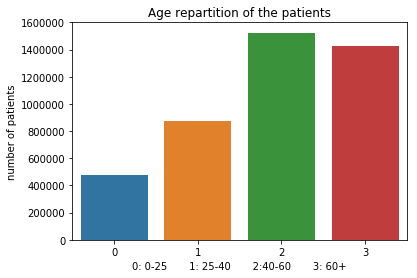

In [50]:
sns.countplot(data2['label_age'])
plt.title('Age repartition of the patients')
plt.xlabel('0: 0-25       1: 25-40       2:40-60       3: 60+')
plt.ylabel('number of patients')
plt.show()


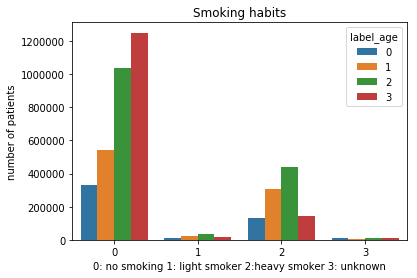

In [27]:
sns.countplot(x="label_smoker", hue="label_age", data = data2)
plt.title('Smoking habits')
plt.xlabel('0: no smoking 1: light smoker 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

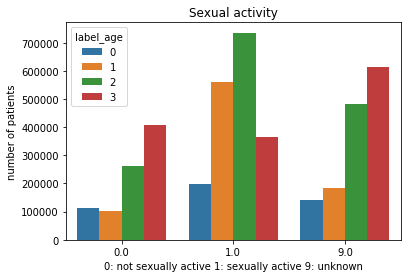

In [28]:
sns.countplot(x="soc_hx_sexual_act_yn", hue="label_age", data = data2)
plt.title('Sexual activity')
plt.xlabel('0: not sexually active 1: sexually active 9: unknown')
plt.ylabel('number of patients')
plt.show()

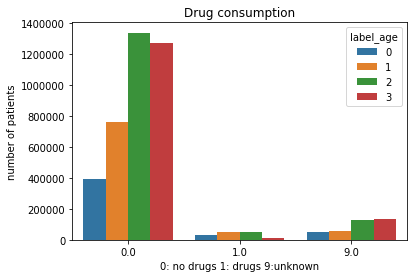

In [29]:
sns.countplot(x="soc_hx_ill_drug_yn", hue="label_age", data = data2)
plt.title('Drug consumption')
plt.xlabel('0: no drugs 1: drugs 9:unknown')
plt.ylabel('number of patients')
plt.show()

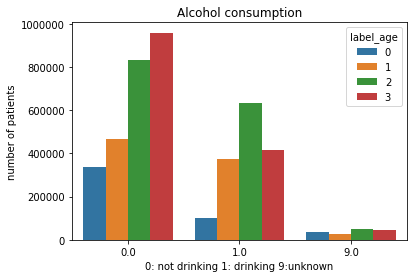

In [30]:
sns.countplot(x="soc_hx_alc_yn", hue="label_age", data = data2)
plt.title('Alcohol consumption')
plt.xlabel('0: not drinking 1: drinking 9:unknown')
plt.ylabel('number of patients')
plt.show()

In [31]:
data2_bis = data2
data2_bis["soc_hx_alc_yn"] = data2_bis["soc_hx_alc_yn"].replace(9,np.nan)
data2_bis["soc_hx_ill_drug_yn"] = data2_bis["soc_hx_ill_drug_yn"].replace(9,np.nan)
data2_bis["soc_hx_sexual_act_yn"] = data2_bis["soc_hx_sexual_act_yn"].replace(9,np.nan)

In [32]:
data2_bis.head()

,Unnamed: 0,studyid,encid,soc_hx_dt_m,soc_hx_smoke_stts,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn,soc_hx_bc_type,pt_birth_dt_m,...,dx6_cd,dx6_nm,dx7_dt_m,dx7_cd,dx7_nm,label_sex,label_ethnicity,Age,label_age,label_smoker
0,0,PT101071,ENC8471401,2013-11-08,FORMER SMOKER,0.0,0.0,NaN,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
1,1,PT101071,ENC9836064,2013-12-20,FORMER SMOKER,0.0,0.0,NaN,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
2,2,PT101071,ENC15082,2014-04-08,FORMER SMOKER,1.0,0.0,NaN,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
3,3,PT101071,ENC17976449,2013-10-19,FORMER SMOKER,NaN,NaN,NaN,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,82,3,0
4,4,PT101071,ENC11067729,2014-07-30,FORMER SMOKER,1.0,0.0,NaN,NONE SPECIFIED,1931-03-29,...,NaN,NaN,NaN,NaN,NaN,1,0,83,3,0


In [33]:
data3 = pd.DataFrame(sorted(data2['studyid'].unique()), columns = ['studyid'])

In [34]:
col1 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_alc_yn'].mean()).reset_index();
col2 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_alc_yn'].median()).reset_index();
col3 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_ill_drug_yn'].mean()).reset_index();
col4 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_ill_drug_yn'].median()).reset_index();
col5 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_sexual_act_yn'].mean()).reset_index();
col6 = pd.DataFrame(data2_bis.groupby('studyid')['soc_hx_sexual_act_yn'].median()).reset_index();
col7 = pd.DataFrame(data2_bis.groupby('studyid')['label_smoker'].mean()).reset_index();
col8 = pd.DataFrame(data2_bis.groupby('studyid')['label_smoker'].median()).reset_index();

In [36]:
data3['mean_alcohol'] = col1['soc_hx_alc_yn']
data3['median_alcohol'] = col2['soc_hx_alc_yn']
data3['mean_drug'] = col3['soc_hx_ill_drug_yn']
data3['median_drug'] = col4['soc_hx_ill_drug_yn']
data3['mean_sexual_act'] = col5['soc_hx_sexual_act_yn']
data3['median_sexual_act'] = col6['soc_hx_sexual_act_yn']
data3['mean_smoker'] = col7['label_smoker']
data3['median_smoker'] = col8['label_smoker']
data3['label_age'] = data2_bis['label_age']

In [37]:
data3.head()

,studyid,mean_alcohol,median_alcohol,mean_drug,median_drug,mean_sexual_act,median_sexual_act,mean_smoker,median_smoker,label_age
0,PT1,1.000000,1.0,0.0,0.0,NaN,NaN,0.666667,0.0,3
1,PT10,0.202703,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,3
2,PT100,1.000000,1.0,0.0,0.0,NaN,NaN,0.000000,0.0,3
3,PT1000,0.310811,0.0,0.0,0.0,1.0,1.0,1.243243,2.0,3
4,PT10000,0.000000,0.0,0.0,0.0,0.0,0.0,0.108434,0.0,3


In [156]:
data3['max_occ_alcohol'] = pd.cut(data3['median_alcohol'], bins = [0,0.5,1], labels=[0,1], include_lowest=True)
data3['max_occ_drug'] = pd.cut(data3['median_drug'], bins = [0,0.5,1], labels=[0,1], include_lowest=True)
data3['max_occ_sexual_act'] = pd.cut(data3['median_sexual_act'], bins = [0,0.5,1], labels=[0,1], include_lowest=True)
data3['max_occ_smoker'] = pd.cut(data3['median_smoker'], bins = [0,0.5,1,2,3], labels=[0,1,2,3], include_lowest=True)


In [157]:
columns_to_add = data3[['studyid', 'max_occ_alcohol', 'max_occ_drug', 'max_occ_sexual_act','max_occ_smoker']]

In [158]:
demo_pb = pd.read_csv('demographics_with_problems_labels_v2.csv', sep=';' , encoding = 'utf-8')

In [159]:
columns_to_add = columns_to_add.set_index('studyid')
demo_pb = demo_pb.set_index('studyid')

In [160]:
result = demo_pb.join(columns_to_add)

In [161]:
result = result.reset_index()
del result['Unnamed: 0']

In [162]:
result.shape

(198700, 20)

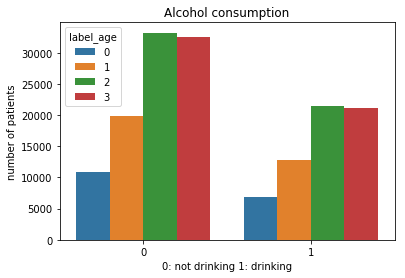

In [39]:
sns.countplot(x="max_occ_alcohol", hue="label_age", data = data3)
plt.title('Alcohol consumption')
plt.xlabel('0: not drinking 1: drinking')
plt.ylabel('number of patients')
plt.show()

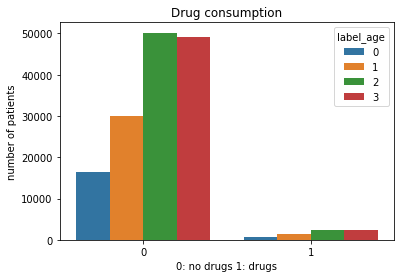

In [40]:
sns.countplot(x="max_occ_drug", hue="label_age", data = data3)
plt.title('Drug consumption')
plt.xlabel('0: no drugs 1: drugs')
plt.ylabel('number of patients')
plt.show()

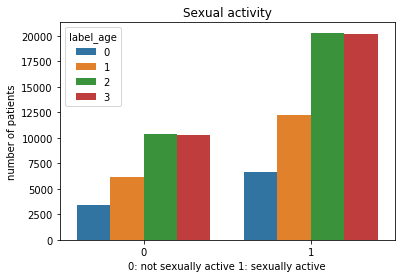

In [41]:
sns.countplot(x="max_occ_sexual_act", hue="label_age", data = data3)
plt.title('Sexual activity')
plt.xlabel('0: not sexually active 1: sexually active')
plt.ylabel('number of patients')
plt.show()

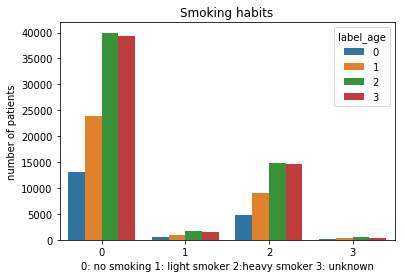

In [42]:
sns.countplot(x="max_occ_smoker", hue="label_age", data = data3)
plt.title('Smoking habits')
plt.xlabel('0: no smoking 1: light smoker 2:heavy smoker 3: unknown')
plt.ylabel('number of patients')
plt.show()

# Anxiety

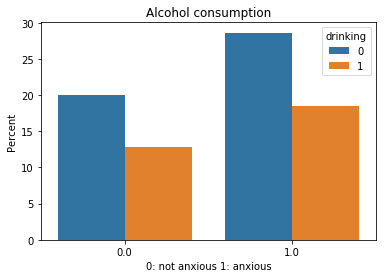

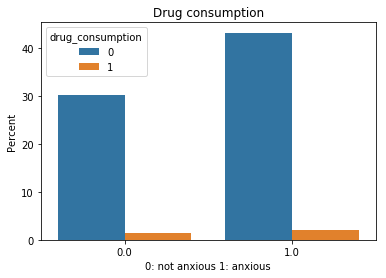

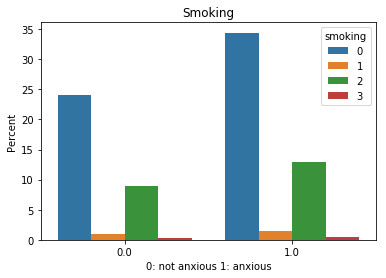

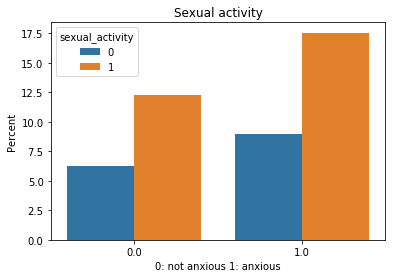

In [55]:
sns.barplot(x = "isAnxiety", y = "isAnxiety", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: not anxious 1: anxious')
plt.show()

sns.barplot(x="isAnxiety", y="isAnxiety",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: not anxious 1: anxious')
plt.show()

sns.barplot(x="isAnxiety", y="isAnxiety",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: not anxious 1: anxious')
plt.show()

sns.barplot(x="isAnxiety", y="isAnxiety",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: not anxious 1: anxious')
plt.show()

In [148]:
p1 = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isAnxiety'] == 1)]) / len(result[result['isAnxiety'] == 1]),4)
print ('percentage of anxious people that drinks : ', p1*100, '%')

p1_n = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isAnxiety'] == 0)]) / len(result[result['isAnxiety'] == 0]),4)
print ('percentage of non anxious people that drinks : ', p1_n*100, '%')

p2 = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isAnxiety'] == 1)]) / len(result[result['isAnxiety'] == 1]),4)
print ('percentage of anxious people that takes drugs : ', p2*100, '%')

p2_n = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isAnxiety'] == 0)]) / len(result[result['isAnxiety'] == 0]),4)
print ('percentage of non anxious people that takes drugs : ', p2_n*100, '%')

p3 = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isAnxiety'] == 1)]) / len(result[result['isAnxiety'] == 1]),4)
print ('percentage of anxious people that is sexually active : ', p3*100, '%')

p3_n = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isAnxiety'] == 0)]) / len(result[result['isAnxiety'] == 0]),4)
print ('percentage of non anxious people that is sexually active : ', p3_n*100, '%')

p4 = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isAnxiety'] == 1)]) / len(result[result['isAnxiety'] == 1]),4)
print ('percentage of anxious people that lightly smokes : ', p4*100, '%')

p4_n = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isAnxiety'] == 0)]) / len(result[result['isAnxiety'] == 0]),4)
print ('percentage of non anxious people that lightly smokes : ', p4_n*100, '%')

p5 = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isAnxiety'] == 1)]) / len(result[result['isAnxiety'] == 1]),4)
print ('percentage of anxious people that heavily smokes : ', p5*100, '%')

p5_n = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isAnxiety'] == 0)]) / len(result[result['isAnxiety'] == 0]),4)
print ('percentage of non anxious people that heavily smokes : ', p5_n*100, '%')


percentage of anxious people that drinks :  38.33 %
percentage of non anxious people that drinks :  34.09 %
percentage of anxious people that takes drugs :  3.28 %
percentage of non anxious people that takes drugs :  4.64 %
percentage of anxious people that is sexually active :  36.6 %
percentage of non anxious people that is sexually active :  33.55 %
percentage of anxious people that lightly smokes :  2.78 %
percentage of non anxious people that lightly smokes :  2.77 %
percentage of anxious people that heavily smokes :  24.03 %
percentage of non anxious people that heavily smokes :  26.22 %


# Active anxiety

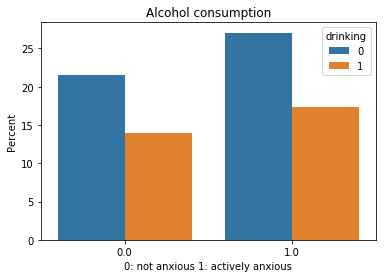

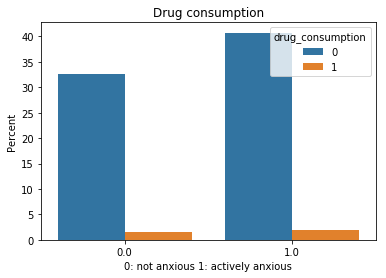

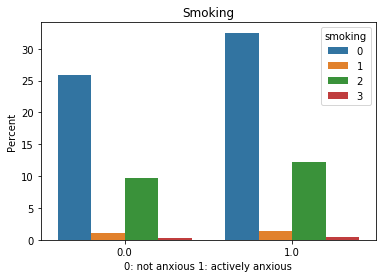

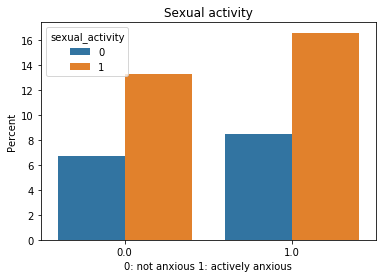

In [59]:
sns.barplot(x = "isActiveAnxiety", y = "isActiveAnxiety", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: not anxious 1: actively anxious')
plt.show()

sns.barplot(x="isActiveAnxiety", y="isActiveAnxiety",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: not anxious 1: actively anxious')
plt.show()

sns.barplot(x="isActiveAnxiety", y="isActiveAnxiety",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: not anxious 1: actively anxious')
plt.show()

sns.barplot(x="isActiveAnxiety", y="isActiveAnxiety",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: not anxious 1: actively anxious')
plt.show()

In [149]:
p1_a = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveAnxiety'] == 1)]) / len(result[result['isActiveAnxiety'] == 1]),4)
print ('percentage of actively anxious people that drinks : ', p1_a*100, '%')

p1_na = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveAnxiety'] == 0)]) / len(result[result['isActiveAnxiety'] == 0]),4)
print ('percentage of non anxious people that drinks : ', p1_na*100, '%')

p2_a = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveAnxiety'] == 1)]) / len(result[result['isActiveAnxiety'] == 1]),4)
print ('percentage of actively anxious people that takes drugs : ', p2_a*100, '%')

p2_na = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveAnxiety'] == 0)]) / len(result[result['isActiveAnxiety'] == 0]),4)
print ('percentage of non anxious people that takes drugs : ', p2_na*100, '%')

p3_a = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveAnxiety'] == 1)]) / len(result[result['isActiveAnxiety'] == 1]),4)
print ('percentage of actively anxious people that is sexually active : ', p3_a*100, '%')

p3_na = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveAnxiety'] == 0)]) / len(result[result['isActiveAnxiety'] == 0]),4)
print ('percentage of non anxious people that is sexually active : ', p3_na*100, '%')

p4_a = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveAnxiety'] == 1)]) / len(result[result['isActiveAnxiety'] == 1]),4)
print ('percentage of actively anxious people that lightly smokes : ', p4_a*100, '%')

p4_na = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveAnxiety'] == 0)]) / len(result[result['isActiveAnxiety'] == 0]),4)
print ('percentage of non anxious people that lightly smokes : ', p4_na*100, '%')

p5_a = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveAnxiety'] == 1)]) / len(result[result['isActiveAnxiety'] == 1]),4)
print ('percentage of actively anxious people that heavily smokes : ', p5_a*100, '%')

p5_na = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveAnxiety'] == 0)]) / len(result[result['isActiveAnxiety'] == 0]),4)
print ('percentage of non anxious people that heavily smokes : ', p5_na*100, '%')

percentage of actively anxious people that drinks :  38.43 %
percentage of non anxious people that drinks :  34.28 %
percentage of actively anxious people that takes drugs :  3.3 %
percentage of non anxious people that takes drugs :  4.52 %
percentage of actively anxious people that is sexually active :  36.09 %
percentage of non anxious people that is sexually active :  34.41 %
percentage of actively anxious people that lightly smokes :  2.79 %
percentage of non anxious people that lightly smokes :  2.75 %
percentage of actively anxious people that heavily smokes :  24.11 %
percentage of non anxious people that heavily smokes :  25.96 %


# Sleep Disorder

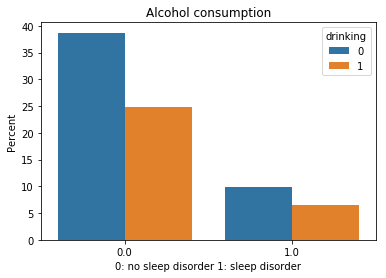

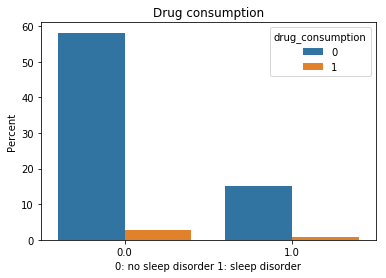

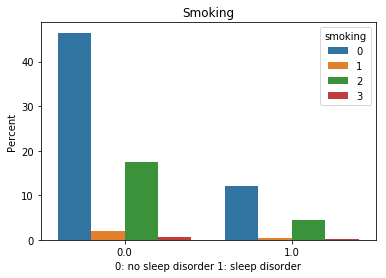

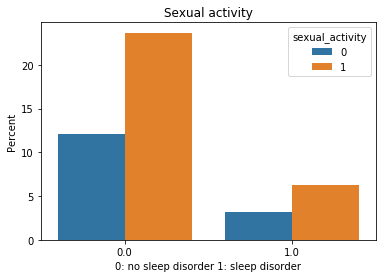

In [58]:
sns.barplot(x = "isSleepDisorder", y = "isSleepDisorder", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: no sleep disorder 1: sleep disorder')
plt.show()

sns.barplot(x="isSleepDisorder", y="isSleepDisorder",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: no sleep disorder 1: sleep disorder')
plt.show()

sns.barplot(x="isSleepDisorder", y="isSleepDisorder",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: no sleep disorder 1: sleep disorder')
plt.show()

sns.barplot(x="isSleepDisorder", y="isSleepDisorder",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: no sleep disorder 1: sleep disorder')
plt.show()

In [150]:
p1_s = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isSleepDisorder'] == 1)]) / len(result[result['isSleepDisorder'] == 1]),4)
print ('percentage of people with sleep disorder that drinks : ', p1_s*100, '%')

p1_ns = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isSleepDisorder'] == 0)]) / len(result[result['isSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that drinks : ', p1_ns*100, '%')

p2_s = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isSleepDisorder'] == 1)]) / len(result[result['isSleepDisorder'] == 1]),4)
print ('percentage of people with sleep disorder that takes drugs : ', p2_s*100, '%')

p2_ns = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isSleepDisorder'] == 0)]) / len(result[result['isSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that takes drugs : ', p2_ns*100, '%')

p3_s = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isSleepDisorder'] == 1)]) / len(result[result['isSleepDisorder'] == 1]),4)
print ('percentage of people with sleep disorder that is sexually active : ', p3_s*100, '%')

p3_ns = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isSleepDisorder'] == 0)]) / len(result[result['isSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that is sexually active : ', p3_ns*100, '%')

p4_s = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isSleepDisorder'] == 1)]) / len(result[result['isSleepDisorder'] == 1]),4)
print ('percentage of people with sleep disorder that lightly smokes : ', p4_s*100, '%')

p4_ns = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isSleepDisorder'] == 0)]) / len(result[result['isSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that lightly smokes : ', p4_ns*100, '%')

p5_s = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isSleepDisorder'] == 1)]) / len(result[result['isSleepDisorder'] == 1]),4)
print ('percentage of people with sleep disorder that heavily smokes : ', p5_s*100, '%')

p5_ns = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isSleepDisorder'] == 0)]) / len(result[result['isSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that heavily smokes : ', p5_ns*100, '%')

percentage of people with sleep disorder that drinks :  39.06 %
percentage of people with no sleep disorder that drinks :  35.94 %
percentage of people with sleep disorder that takes drugs :  2.7 %
percentage of people with no sleep disorder that takes drugs :  4.14 %
percentage of people with sleep disorder that is sexually active :  35.03 %
percentage of people with no sleep disorder that is sexually active :  35.43 %
percentage of people with sleep disorder that lightly smokes :  2.81 %
percentage of people with no sleep disorder that lightly smokes :  2.77 %
percentage of people with sleep disorder that heavily smokes :  19.95 %
percentage of people with no sleep disorder that heavily smokes :  26.23 %


# Active sleep disorder

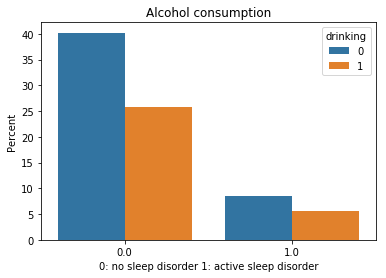

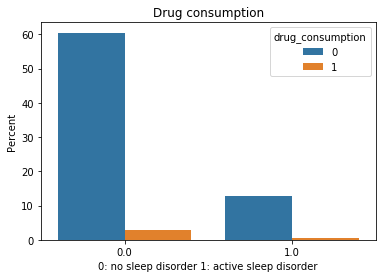

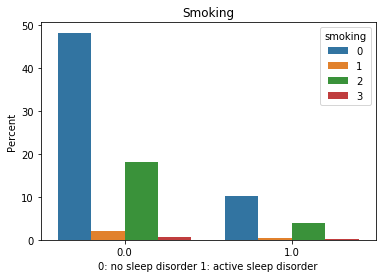

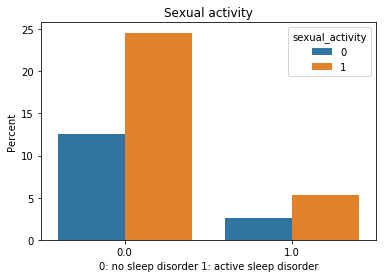

In [60]:
sns.barplot(x = "isActiveSleepDisorder", y = "isActiveSleepDisorder", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: no sleep disorder 1: active sleep disorder')
plt.show()

sns.barplot(x="isActiveSleepDisorder", y="isActiveSleepDisorder",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: no sleep disorder 1: active sleep disorder')
plt.show()

sns.barplot(x="isActiveSleepDisorder", y="isActiveSleepDisorder",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: no sleep disorder 1: active sleep disorder')
plt.show()

sns.barplot(x="isActiveSleepDisorder", y="isActiveSleepDisorder",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: no sleep disorder 1: active sleep disorder')
plt.show()

In [151]:
p1_as = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveSleepDisorder'] == 1)]) / len(result[result['isActiveSleepDisorder'] == 1]),4)
print ('percentage of people with active sleep disorder that drinks : ', p1_as*100, '%')

p1_nas = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveSleepDisorder'] == 0)]) / len(result[result['isActiveSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that drinks : ', p1_nas*100, '%')

p2_as = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveSleepDisorder'] == 1)]) / len(result[result['isActiveSleepDisorder'] == 1]),4)
print ('percentage of people with active sleep disorder that takes drugs : ', p2_as*100, '%')

p2_nas = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveSleepDisorder'] == 0)]) / len(result[result['isActiveSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that takes drugs : ', p2_nas*100, '%')

p3_as = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveSleepDisorder'] == 1)]) / len(result[result['isActiveSleepDisorder'] == 1]),4)
print ('percentage of people with active sleep disorder that is sexually active : ', p3_as*100, '%')

p3_nas = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveSleepDisorder'] == 0)]) / len(result[result['isActiveSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that is sexually active : ', p3_nas*100, '%')

p4_as = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveSleepDisorder'] == 1)]) / len(result[result['isActiveSleepDisorder'] == 1]),4)
print ('percentage of people with active sleep disorder that lightly smokes : ', p4_as*100, '%')

p4_nas = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveSleepDisorder'] == 0)]) / len(result[result['isActiveSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that lightly smokes : ', p4_nas*100, '%')

p5_as = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveSleepDisorder'] == 1)]) / len(result[result['isActiveSleepDisorder'] == 1]),4)
print ('percentage of people with active sleep disorder that heavily smokes : ', p5_as*100, '%')

p5_nas = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveSleepDisorder'] == 0)]) / len(result[result['isActiveSleepDisorder'] == 0]),4)
print ('percentage of people with no sleep disorder that heavily smokes : ', p5_nas*100, '%')

percentage of people with active sleep disorder that drinks :  39.27 %
percentage of people with no sleep disorder that drinks :  36.01 %
percentage of people with active sleep disorder that takes drugs :  2.79 %
percentage of people with no sleep disorder that takes drugs :  4.06 %
percentage of people with active sleep disorder that is sexually active :  34.2 %
percentage of people with no sleep disorder that is sexually active :  35.59 %
percentage of people with active sleep disorder that lightly smokes :  2.82 %
percentage of people with no sleep disorder that lightly smokes :  2.77 %
percentage of people with active sleep disorder that heavily smokes :  20.46 %
percentage of people with no sleep disorder that heavily smokes :  25.88 %


# Depression

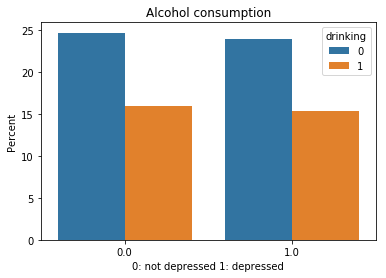

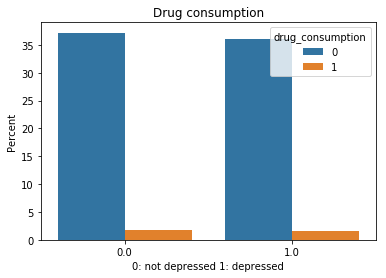

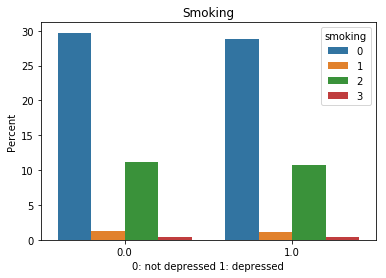

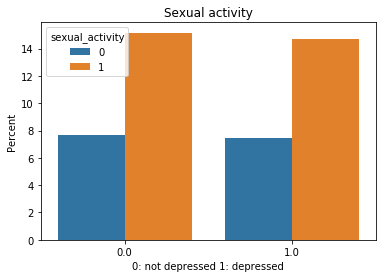

In [61]:
sns.barplot(x = "isDepression", y = "isDepression", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: not depressed 1: depressed')
plt.show()

sns.barplot(x="isDepression", y="isDepression",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: not depressed 1: depressed')
plt.show()

sns.barplot(x="isDepression", y="isDepression",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: not depressed 1: depressed')
plt.show()

sns.barplot(x="isDepression", y="isDepression",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: not depressed 1: depressed')
plt.show()

In [152]:
p1_d = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isDepression'] == 1)]) / len(result[result['isDepression'] == 1]),4)
print ('percentage of depressed people that drinks : ', p1_d*100, '%')

p1_nd = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isDepression'] == 0)]) / len(result[result['isDepression'] == 0]),4)
print ('percentage of not depressed people that drinks : ', p1_nd*100, '%')

p2_d = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isDepression'] == 1)]) / len(result[result['isDepression'] == 1]),4)
print ('percentage of depressed people that takes drugs : ', p2_d*100, '%')

p2_nd = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isDepression'] == 0)]) / len(result[result['isDepression'] == 0]),4)
print ('percentage of not depressed people that takes drugs : ', p2_nd*100, '%')

p3_d = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isDepression'] == 1)]) / len(result[result['isDepression'] == 1]),4)
print ('percentage of depressed people that is sexually active : ', p3_d*100, '%')

p3_nd = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isDepression'] == 0)]) / len(result[result['isDepression'] == 0]),4)
print ('percentage of not depressed people that is sexually active : ', p3_nd*100, '%')

p4_d = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isDepression'] == 1)]) / len(result[result['isDepression'] == 1]),4)
print ('percentage of depressed people that lightly smokes : ', p4_d*100, '%')

p4_nd = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isDepression'] == 0)]) / len(result[result['isDepression'] == 0]),4)
print ('percentage of not depressed people that lightly smokes : ', p4_nd*100, '%')

p5_d = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isDepression'] == 1)]) / len(result[result['isDepression'] == 1]),4)
print ('percentage of depressed people that heavily smokes : ', p5_d*100, '%')

p5_nd = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isDepression'] == 0)]) / len(result[result['isDepression'] == 0]),4)
print ('percentage of not depressed people that heavily smokes : ', p5_nd*100, '%')

percentage of depressed people that drinks :  35.63 %
percentage of not depressed people that drinks :  37.51 %
percentage of depressed people that takes drugs :  3.96 %
percentage of not depressed people that takes drugs :  3.73 %
percentage of depressed people that is sexually active :  35.66 %
percentage of not depressed people that is sexually active :  35.04 %
percentage of depressed people that lightly smokes :  2.68 %
percentage of not depressed people that lightly smokes :  2.86 %
percentage of depressed people that heavily smokes :  25.24 %
percentage of not depressed people that heavily smokes :  24.63 %


# Active Depression

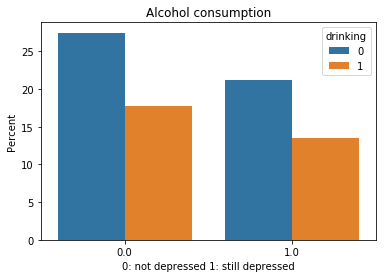

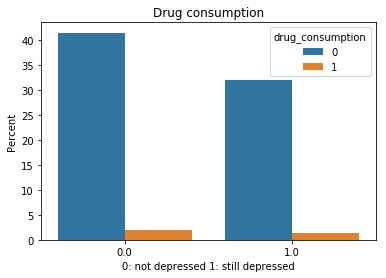

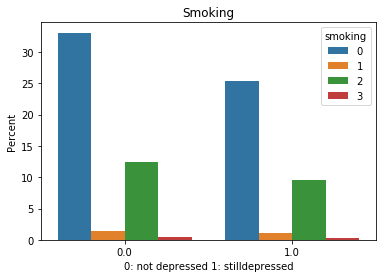

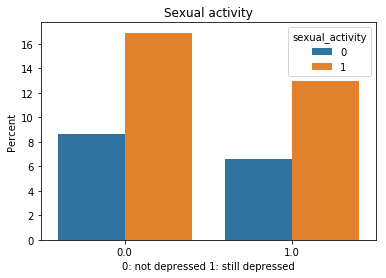

In [63]:
sns.barplot(x = "isActiveDepression", y = "isActiveDepression", hue = "drinking", data = demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Alcohol consumption')
plt.xlabel('0: not depressed 1: still depressed')
plt.show()

sns.barplot(x="isActiveDepression", y="isActiveDepression",hue ="drug_consumption", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Drug consumption')
plt.xlabel('0: not depressed 1: still depressed')
plt.show()

sns.barplot(x="isActiveDepression", y="isActiveDepression",hue ="smoking", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Smoking')
plt.xlabel('0: not depressed 1: stilldepressed')
plt.show()

sns.barplot(x="isActiveDepression", y="isActiveDepression",hue ="sexual_activity", data= demo_pb, estimator = lambda x: len(x) / len(demo_pb) * 100)
plt.ylabel('Percent')
plt.title('Sexual activity')
plt.xlabel('0: not depressed 1: still depressed')
plt.show()

In [153]:
p1_ad = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveDepression'] == 1)]) / len(result[result['isActiveDepression'] == 1]),4)
print ('percentage of actively depressed people that drinks : ', p1_ad*100, '%')

p1_nad = np.around(len(result[np.logical_and(result['max_occ_alcohol'] == 1, result['isActiveDepression'] == 0)]) / len(result[result['isActiveDepression'] == 0]),4)
print ('percentage of not depressed people that drinks : ', p1_nad*100, '%')

p2_ad = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveDepression'] == 1)]) / len(result[result['isActiveDepression'] == 1]),4)
print ('percentage of actively depressed people that takes drugs : ', p2_ad*100, '%')

p2_nad = np.around(len(result[np.logical_and(result['max_occ_drug'] == 1, result['isActiveDepression'] == 0)]) / len(result[result['isActiveDepression'] == 0]),4)
print ('percentage of not depressed people that takes drugs : ', p2_nad*100, '%')

p3_ad = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveDepression'] == 1)]) / len(result[result['isActiveDepression'] == 1]),4)
print ('percentage of actively depressed people that is sexually active : ', p3_ad*100, '%')

p3_nad = np.around(len(result[np.logical_and(result['max_occ_sexual_act'] == 1, result['isActiveDepression'] == 0)]) / len(result[result['isActiveDepression'] == 0]),4)
print ('percentage of not depressed people that is sexually active : ', p3_nad*100, '%')

p4_ad = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveDepression'] == 1)]) / len(result[result['isActiveDepression'] == 1]),4)
print ('percentage of actively depressed people that lightly smokes : ', p4_ad*100, '%')

p4_nad = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 1, result['isActiveDepression'] == 0)]) / len(result[result['isActiveDepression'] == 0]),4)
print ('percentage of not depressed people that lightly smokes : ', p4_nad*100, '%')

p5_ad = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveDepression'] == 1)]) / len(result[result['isActiveDepression'] == 1]),4)
print ('percentage of actively depressed people that heavily smokes : ', p5_ad*100, '%')

p5_nad = np.around(len(result[np.logical_and(result['max_occ_smoker'] == 2, result['isActiveDepression'] == 0)]) / len(result[result['isActiveDepression'] == 0]),4)
print ('percentage of not depressed people that heavily smokes : ', p5_nad*100, '%')

percentage of actively depressed people that drinks :  35.41 %
percentage of not depressed people that drinks :  37.48 %
percentage of actively depressed people that takes drugs :  4.09 %
percentage of not depressed people that takes drugs :  3.65 %
percentage of actively depressed people that is sexually active :  34.12 %
percentage of not depressed people that is sexually active :  36.29 %
percentage of actively depressed people that lightly smokes :  2.67 %
percentage of not depressed people that lightly smokes :  2.86 %
percentage of actively depressed people that heavily smokes :  25.47 %
percentage of not depressed people that heavily smokes :  24.52 %


# Drinking

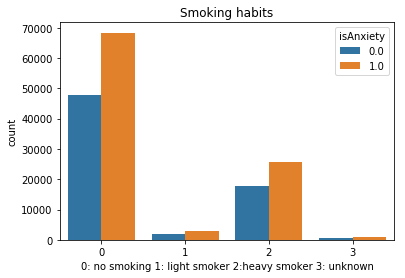

In [70]:
sns.countplot(x = "smoking", hue = "isAnxiety", data = demo_pb)
plt.title('Smoking habits')
plt.xlabel('0: no smoking 1: light smoker 2:heavy smoker 3: unknown')
plt.show()